In [1]:
import cv2
from openvino.inference_engine import IECore
ie = IECore()
import matplotlib.pyplot as plt

In [2]:
def load(filename,num_sources = 1):
    filename_bin = filename.split('.')[0]+".bin"
    net = ie.read_network(model = filename,weights = filename_bin)
    input_layer = next(iter(net.inputs))
    n,c,h,w = net.inputs[input_layer].shape
    exec_net = ie.load_network(network=net,device_name="CPU",num_requests = num_sources)
    output_layer = next(iter(net.outputs))

    return exec_net,input_layer,output_layer,(n,c,h,w)

In [3]:
exec_net,input_layer,output_layer,size=load("/media/omkar/omkar3/openvino/openvino_parallel/Openvino/person-reidentification-retail-0288/FP32/person-reidentification-retail-0288.xml")

/home/omkar/anaconda3/envs/openvino/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  after removing the cwd from sys.path.


In [4]:
def preprocess(frame,size):
    n,c,h,w = size
    input_image = cv2.resize(frame, (w,h))
    input_image = input_image.transpose((2,0,1))
    input_image.reshape((n,c,h,w))
    return input_image

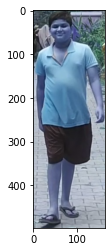

In [14]:
img1 = cv2.imread("1648123096.jpg")
plt.imshow(img1)
plt.show()

In [15]:
input_image = preprocess(img1,size)

In [16]:
infer_res = exec_net.start_async(request_id=0,inputs={input_layer:input_image})
status=infer_res.wait()
results = exec_net.requests[0].outputs[output_layer]

/home/omkar/anaconda3/envs/openvino/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'outputs' property of InferRequest is deprecated. Please instead use 'output_blobs' property.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
results=results[0]

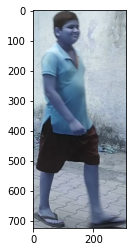

In [18]:
img1 = cv2.imread("1648126693.jpg")
plt.imshow(img1)
plt.show()

In [19]:

input_image = preprocess(img1,size)
infer_res = exec_net.start_async(request_id=0,inputs={input_layer:input_image})
status=infer_res.wait()
results1 = exec_net.requests[0].outputs[output_layer]

/home/omkar/anaconda3/envs/openvino/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'outputs' property of InferRequest is deprecated. Please instead use 'output_blobs' property.
  after removing the cwd from sys.path.


In [20]:
results1=results1[0]

In [21]:
import torch

In [22]:
x = torch.tensor(results).unsqueeze(0)
y = torch.tensor(results1).unsqueeze(0)
torch.cosine_similarity(x, y) 

tensor([0.7721])

In [81]:
for i,j in enumerate(zip([1,2,3,4],[1,2,3,4])):
    print(i,j)

0 (1, 1)
1 (2, 2)
2 (3, 3)
3 (4, 4)


In [1]:
t = {
    1:[1]
}

In [3]:
t[1].append(2)

In [4]:
t

{1: [1, 2]}